In [2]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
test_path = pd.read_csv('/test.csv')  # from Kaggle Titanic dataset
train_path = pd.read_csv('/train.csv')

train_path.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Basic info
train_path.info()

# Check missing values
train_path.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
# Fill missing 'Age' with median
train_path['Age'].fillna(train_path['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
train_path['Embarked'].fillna(train_path['Embarked'].mode()[0], inplace=True)

# Fill missing 'Cabin' with 'Unknown'
train_path['Cabin'].fillna('Unknown', inplace=True)

# Check again
train_path.isnull().sum()


/tmp/ipython-input-3168269924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_path['Age'].fillna(train_path['Age'].median(), inplace=True)
/tmp/ipython-input-3168269924.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
# FamilySize = SibSp + Parch + 1
train_path['FamilySize'] = train_path['SibSp'] + train_path['Parch'] + 1

# AgeGroup = child/teen/adult/senior
def age_group(age):
    if age < 13:
        return 'Child'
    elif age < 20:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

train_path['AgeGroup'] = train_path['Age'].apply(age_group)

train_path[['Age', 'AgeGroup', 'FamilySize']].head()


,Age,AgeGroup,FamilySize
0,22.0,Adult,2
1,38.0,Adult,2
2,26.0,Adult,1
3,35.0,Adult,2
4,35.0,Adult,1


In [6]:
# Numeric summaries
train_path[['Age', 'Fare']].describe()


,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [7]:
# By Sex and Pclass
survival_by_group = train_path.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()
print(survival_by_group)

# Average Age and Fare by Survival
avg_stats = train_path.groupby('Survived')[['Age', 'Fare']].mean().reset_index()
print(avg_stats)


      Sex  Pclass  Survived
0  female       1  0.968085
1  female       2  0.921053
2  female       3  0.500000
3    male       1  0.368852
4    male       2  0.157407
5    male       3  0.135447
   Survived        Age       Fare
0         0  30.028233  22.117887
1         1  28.291433  48.395408


In [8]:
corr = train_path[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'FamilySize']].corr()
corr


,Survived,Age,Fare,Pclass,SibSp,Parch,FamilySize
Survived,1.000000,-0.064910,0.257307,-0.338481,-0.035322,0.081629,0.016639
Age,-0.064910,1.000000,0.096688,-0.339898,-0.233296,-0.172482,-0.245619
Fare,0.257307,0.096688,1.000000,-0.549500,0.159651,0.216225,0.217138
Pclass,-0.338481,-0.339898,-0.549500,1.000000,0.083081,0.018443,0.065997
SibSp,-0.035322,-0.233296,0.159651,0.083081,1.000000,0.414838,0.890712
Parch,0.081629,-0.172482,0.216225,0.018443,0.414838,1.000000,0.783111
FamilySize,0.016639,-0.245619,0.217138,0.065997,0.890712,0.783111,1.000000


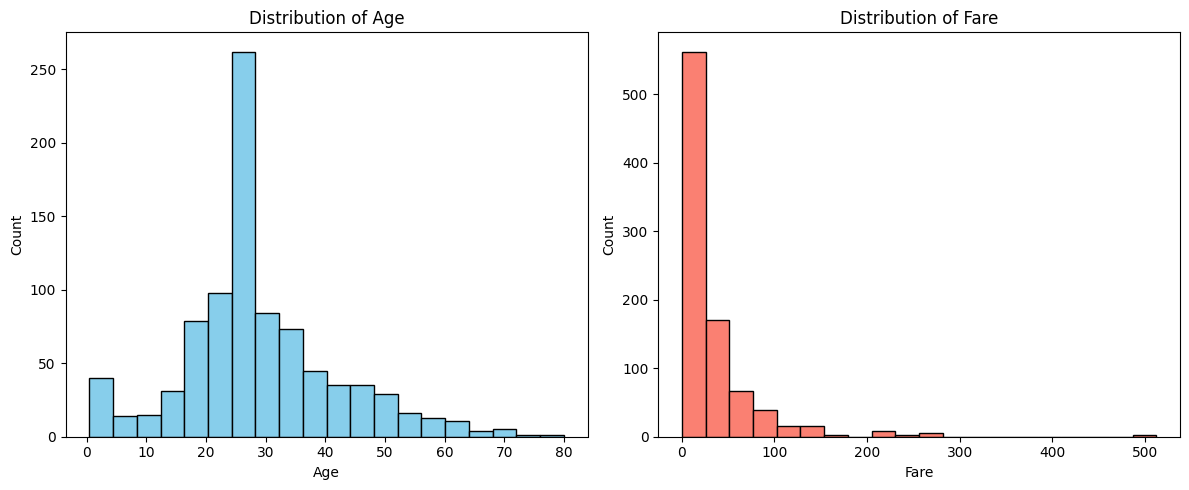

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(train_path['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(train_path['Fare'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


/tmp/ipython-input-3154112967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_path, x='Sex', y='Survived', palette='pastel')
/tmp/ipython-input-3154112967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_path, x='Pclass', y='Survived', palette='muted')


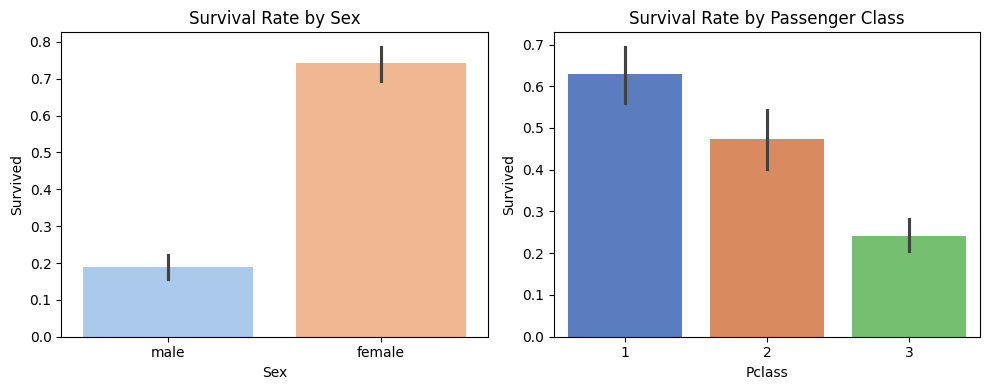

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(data=train_path, x='Sex', y='Survived', palette='pastel')
plt.title('Survival Rate by Sex')

plt.subplot(1,2,2)
sns.barplot(data=train_path, x='Pclass', y='Survived', palette='muted')
plt.title('Survival Rate by Passenger Class')

plt.tight_layout()
plt.show()


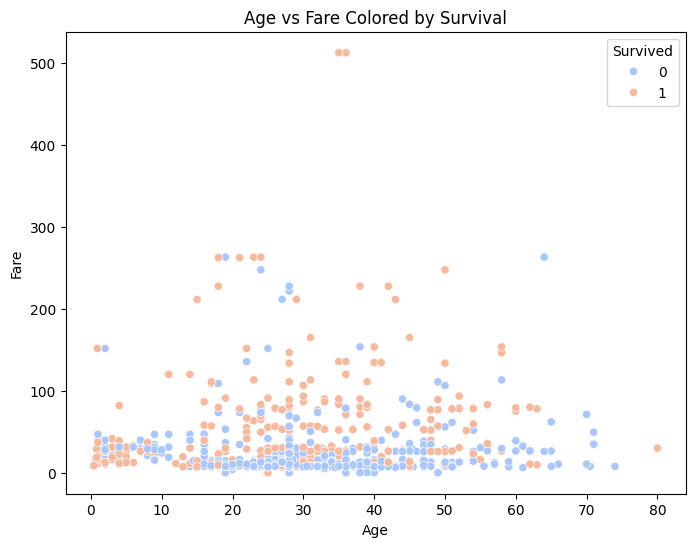

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_path, x='Age', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Age vs Fare Colored by Survival')
plt.show()


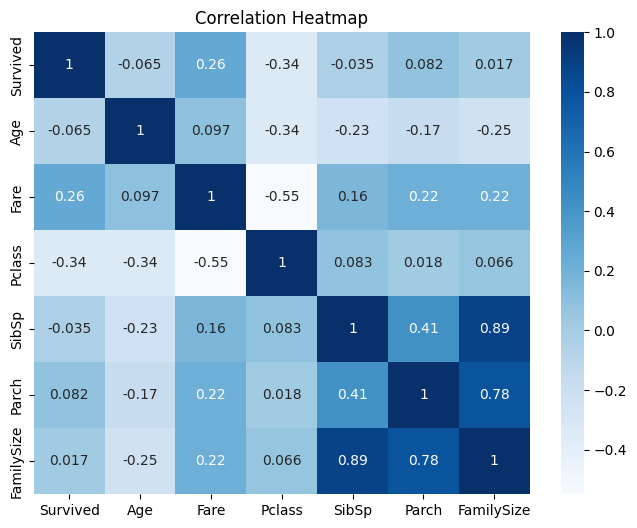

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
train_encoded = train_path.copy()
for col in ['Sex', 'Embarked', 'AgeGroup']:
    train_encoded[col] = LabelEncoder().fit_transform(train_encoded[col])

# Define features and target
X = train_encoded[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked']]
y = train_encoded['Survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate with cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")


Random Forest Cross-Validation Accuracy: 0.811 ± 0.026


In [15]:
from openai import OpenAI

import os
os.environ["OPENAI_API_KEY"] = ('use your own')

client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])



In [17]:
summary_table = train_path.groupby(['Sex', 'Pclass']).agg(
    Avg_Age=('Age', 'mean'),
    Avg_Fare=('Fare', 'mean'),
    Survival_Rate=('Survived', 'mean')
).reset_index()


table_str = summary_table.to_markdown(index=False)


def ask_llm_about_titanic(table_str, question):
    prompt = f"""
You are a data analyst helping interpret Titanic survival patterns.

Here is a data summary table:
{table_str}

Question: {question}

Provide a clear, data-driven explanation in 3–4 sentences.
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",  # You can also use "gpt-4o" or "gpt-5"
        messages=[
            {"role": "system", "content": "You are a helpful AI data analyst."},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content.strip()


questions = [
    "Summarize which factors most influenced survival.",
    "Explain why children might have had higher survival rates than adults.",
    "Suggest one feature I could create that might improve insights about survival."
]


for q in questions:
    print(f"Question: {q}")
    answer = ask_llm_about_titanic(table_str, q)
    print(f"LLM Answer:\n{answer}\n{'-'*80}")


Question: Summarize which factors most influenced survival.
LLM Answer:
The survival patterns from the Titanic data reveal that gender and passenger class (Pclass) significantly influenced survival rates. Females demonstrated much higher survival rates across all classes, with first-class women at 96.8%, compared to only 36.9% for first-class men. Additionally, survival rates decreased from first class to third class for both genders, particularly notable in males, where the survival rates dropped from 36.9% in first class to just 13.5% in third class. These findings indicate that women, especially those in higher classes, had the highest likelihood of survival during the Titanic disaster.
--------------------------------------------------------------------------------
Question: Explain why children might have had higher survival rates than adults.
LLM Answer:
Although the provided data does not directly include children, it is well-known from historical accounts that children aboard t